In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from bart_playground import *

In [3]:
notebook = "real1_Abalone_init"

In [4]:
import numpy as np

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
X = X.drop(columns=['Sex'])

In [5]:
X.shape

(4177, 7)

In [6]:
X = X.values.astype(float)
y = np.array(y).reshape(-1)

In [7]:
ndpost = 100
n_trees = 100

In [8]:
bart_default = DefaultBART(ndpost=ndpost, nskip=0, n_trees=n_trees)
bart_default.fit(X, y)

Iterations: 100%|██████████| 100/100 [00:02<00:00, 34.93it/s]


In [9]:
bart_default.trace[50].evaluate(X)

array([-0.19425254, -0.32255957, -0.15205953, ..., -0.12618057,
       -0.14342071, -0.15034482], dtype=float32)

In [10]:
vec1 = bart_default.trace[50].evaluate(X)
vec2 = bart_default.trace[51].evaluate(X)

np.linalg.norm(vec1 - vec2)

np.float32(0.47958553)

Time taken for distance calculations: 1.11 seconds


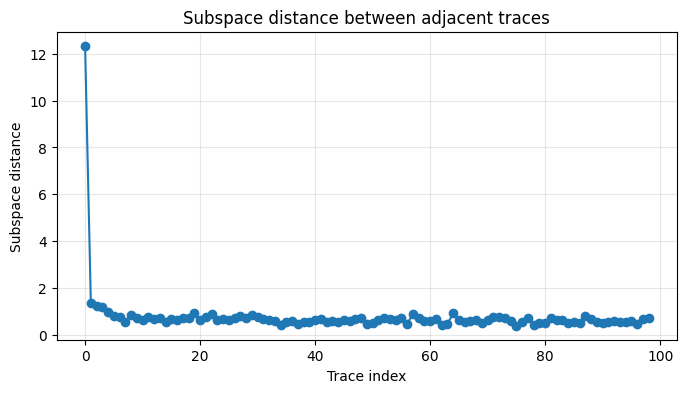

In [11]:
import time
import numpy as np
from scipy.linalg import subspace_angles
import matplotlib.pyplot as plt

start = time.time()

tree_ids = list(range(n_trees))

distances = []
for i in range(ndpost - 1):
    vec1 = bart_default.trace[i].evaluate(X)
    vec2 = bart_default.trace[i + 1].evaluate(X)
    dist = np.linalg.norm(vec1 - vec2)
    distances.append(dist)

end = time.time()
print(f"Time taken for distance calculations: {end - start:.2f} seconds")

plt.figure(figsize=(8, 4))
plt.plot(distances, marker='o')
plt.xlabel('Trace index')
plt.ylabel('Subspace distance')
plt.title('Subspace distance between adjacent traces')
plt.grid(True, alpha=0.3)
plt.show()